

#Comparative Analysis of Machine Learning Models on the Iris Dataset
Program Project :week4

Names of trainees: safa Nasser , Maram Albahli,Abdul aziz Al-Thubaiti

**1-Data Preprocessing**

• Load the Iris dataset

• Perform data exploration and visualization.

• Check for missing values and handle them if any.

• Split the dataset into features and target variables.

In [13]:
# Load the Iris dataset.
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , make_scorer , classification_report , precision_score, recall_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier




iris = datasets.load_iris()
iris_df=pd. DataFrame (iris.data)
iris_df['class']=iris. target
iris_df. columns=['sepal_len',
'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [5]:
#Perform data exploration and visualizatio
iris_df.info()
iris_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Split the dataset into features and target variables.
X = iris_df.drop ('class', axis=1)
y = iris_df['class']

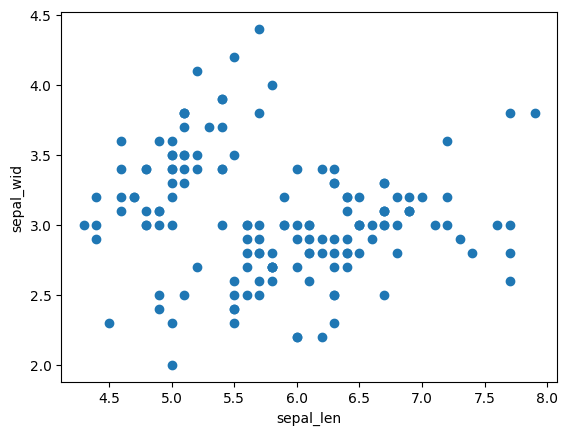

In [7]:
# visualization
plt.scatter(iris_df['sepal_len'],iris_df['sepal_wid'])
plt.xlabel('sepal_len')
plt.ylabel('sepal_wid')
plt.show()

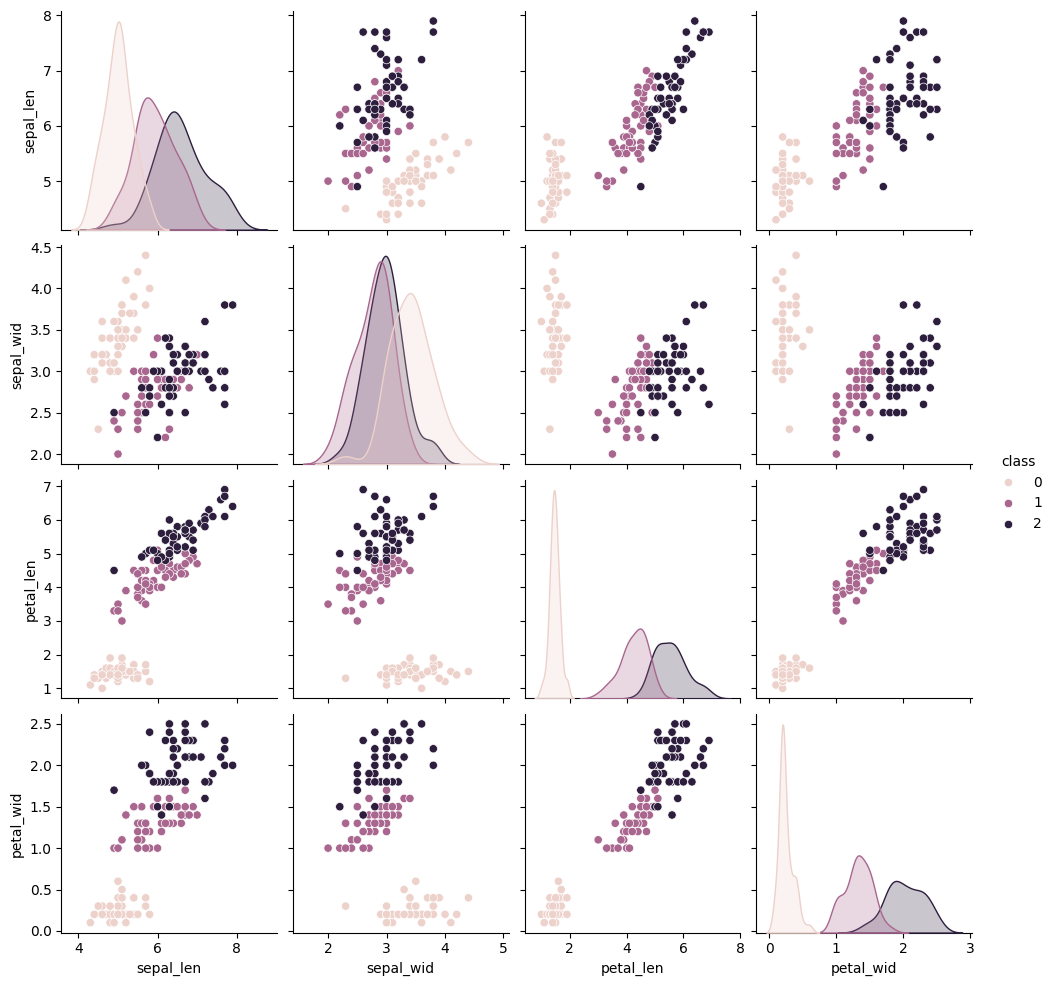

In [8]:
sns.pairplot(iris_df, hue='class')
plt.show()

In [9]:
# Check for missing values and handle them if any.
print(iris_df.isnull().sum())

sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
class        0
dtype: int64


#2-Unsupervised Learning: Clustering and Outlier Detection :
 • Apply K-means clustering algorithm to cluster the data.

 • Visualize the clusters.

 • Detect outliers using appropriate techniques
 such as isolation forest or DBSCAN.

 • Evaluate the clustering results

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


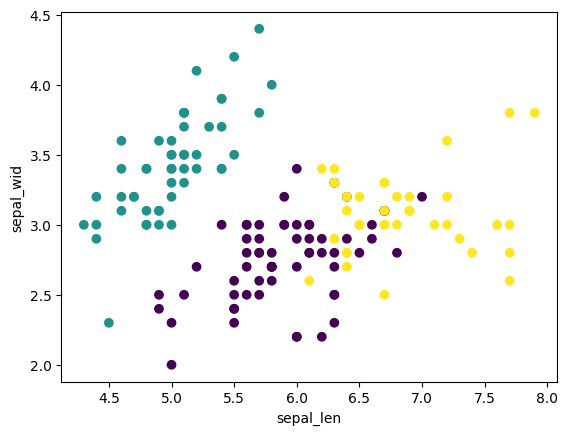

Silhouette Score: 0.5528190123564095


In [10]:
# Apply K-means clustering algorithm to cluster the data.
kmeans = KMeans(n_clusters=3,
random_state=42)
kmeans.fit(X)
# Visualize the clusters
plt.scatter(X['sepal_len'], X['sepal_wid'], c=kmeans.labels_)
plt.xlabel('sepal_len')
plt.ylabel( 'sepal_wid')
plt.show()
# Detect outliers using appropriate techniques such as isolation forest or DBSCAN
isolation_forest = IsolationForest(contamination='auto', random_state=42)
outlier_preds = isolation_forest.fit_predict(X)
# Evaluate the clustering results
silhouette_avg = silhouette_score(X,
kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# 3-Supervised Learning: Baseline Model:
 • Choose an appropriate evaluation metric based on the problem (classification).

 • Split the dataset into training and testing sets.

 • Build a baseline model (e.g., logistic regression or decision tree) using default parameters.

 • Evaluate the baseline model's performance

In [11]:
#Choose an appropriate evaluation metric based on the problem (classification)
# Split the dataset into training andtesting sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Build a baseline model using Logistic Regression
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)
# Evaluate the baseline model's performance
baseline_accuracy = baseline_model.score(X_test,y_test)
print( "Baseline Model Accuracy:", baseline_accuracy)

Baseline Model Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4. Model Comparison :

 • Select 3-4 machine learning algorithms (e.g., SVM, Random Forest, Gradient Boosting) suitable for the problem.

 • Implement each algorithm and evaluate its performance using cross-validation.

 • Compare the performance of algorithms based on evaluation metrics.

 • Select the best-performing algorithm

In [14]:
import numpy as np

# Define the classifiers and pipelines
classifiers = [
    ('Decision Tree', DecisionTreeClassifier(random_state=0)),
    ('KNeighbors', KNeighborsClassifier(n_neighbors=3)),
    ('Support Vector Machine', SVC(random_state=0))
]

pipelines = []
for clf_name, clf in classifiers:
    pipeline = Pipeline([
        ('classifier', clf)
    ])
    pipelines.append((clf_name, pipeline))

# Define scoring metrics
scorer_precision = make_scorer(precision_score, average='weighted')
scorer_recall = make_scorer(recall_score, average='weighted')

# Cross-validation evaluation
best_accuracy_index = -1
best_accuracy_value = 0.0

for idx, (clf_name, pipeline) in enumerate(pipelines):
    scoring = {'accuracy': 'accuracy', 'precision': scorer_precision, 'recall': scorer_recall}
    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring)

    mean_accuracy = cv_results['test_accuracy'].mean()
    if mean_accuracy > best_accuracy_value:
        best_accuracy_index = idx
        best_accuracy_value = mean_accuracy

best_clf_name, best_pipeline = pipelines[best_accuracy_index]

print(f'Best classifier based on accuracy: {best_clf_name}')

Best classifier based on accuracy: KNeighbors


In [15]:
# Define scoring metrics
#
scorer_precision = make_scorer(precision_score, average='weighted')
scorer_recall = make_scorer(recall_score, average='weighted')

# Cross-validation evaluation
for clf_name, pipeline in pipelines:
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    precision = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=scorer_precision)
    recall = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=scorer_recall)

    print(f'{clf_name}:')
    print(f'Mean accuracy: {scores.mean():.4f}, Mean precision: {precision.mean():.4f}, Mean recall: {recall.mean():.4f}\n')


Decision Tree:
Mean accuracy: 0.9417, Mean precision: 0.9466, Mean recall: 0.9417

KNeighbors:
Mean accuracy: 0.9583, Mean precision: 0.9669, Mean recall: 0.9583

Support Vector Machine:
Mean accuracy: 0.9500, Mean precision: 0.9630, Mean recall: 0.9500



In [16]:
# Define scoring metrics

scorer_precision = make_scorer(precision_score, average='weighted')
scorer_recall = make_scorer(recall_score, average='weighted')

# Cross-validation evaluation
for clf_name, pipeline in pipelines:
    scoring = {'accuracy': 'accuracy', 'precision': scorer_precision, 'recall': scorer_recall}
    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring)

    print(f'{clf_name}:')
    print(f'Mean accuracy: {cv_results["test_accuracy"].mean():.4f}')
    print(f'Mean precision: {cv_results["test_precision"].mean():.4f}')
    print(f'Mean recall: {cv_results["test_recall"].mean():.4f}\n')



Decision Tree:
Mean accuracy: 0.9417
Mean precision: 0.9466
Mean recall: 0.9417

KNeighbors:
Mean accuracy: 0.9583
Mean precision: 0.9669
Mean recall: 0.9583

Support Vector Machine:
Mean accuracy: 0.9500
Mean precision: 0.9630
Mean recall: 0.9500



**5- Model Tuning and Ensemble** :

 • Perform hyperparameter tuning on the best-performing algorithm using Grid Search or Random Search.

 • Evaluate the tuned model's performance.

 • Implement an ensemble of the top-performing algorithms and compare its performance with the tuned model

In [17]:
# Define parameter grids for each classifier
param_grids = {
    'Decision Tree': {'max_depth': [4,6, 8]},
    'KNeighbors': {'n_neighbors': [4, 4, 5]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]}
}

# GridSearchCV for each classifier
best_estimators = {}
for clf_name, clf in classifiers:
    param_grid = param_grids[clf_name]
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimators [clf_name] = grid_search.best_estimator_
    print(f'Best parameters for {clf_name}: {grid_search.best_params_}')
    print(f'Best accuracy for {clf_name}: {grid_search.best_score_:.4f}\n')

Best parameters for Decision Tree: {'max_depth': 4}
Best accuracy for Decision Tree: 0.9417

Best parameters for KNeighbors: {'n_neighbors': 4}
Best accuracy for KNeighbors: 0.9500

Best parameters for Support Vector Machine: {'C': 1, 'gamma': 0.1}
Best accuracy for Support Vector Machine: 0.9500



In [18]:
from sklearn.ensemble import VotingClassifier
# Define top-performing models (already tuned)
top_models = [
    ('Decision Tree', best_estimators['Decision Tree']),
    ('KNeighbors', best_estimators['KNeighbors']),
    ('Support Vector Machine', best_estimators['Support Vector Machine'])
]

# Create ensemble
ensemble = VotingClassifier(estimators=top_models, voting='hard')

# Train ensemble
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('Decision Tree',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=0)),
                             ('KNeighbors',
                              KNeighborsClassifier(n_neighbors=4)),
                             ('Support Vector Machine',
                              SVC(C=1, gamma=0.1, random_state=0))])

In [19]:
ensemble_accuracy = ensemble.score(X_test, y_test)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 1.0
